# 📊 Linear Regression Sales Forecast
This notebook demonstrates how to build a **Linear Regression model** for sales forecasting using Python and scikit-learn.

Steps covered:
1. Load and preprocess data
2. Train-test split
3. Train Linear Regression model
4. Evaluate model performance
5. Forecast next 30 days
6. Plot results


In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

## Step 1: Load Data

In [3]:
df = pd.read_csv("./data/salesdata.csv")
df.rename(columns={'ds':'date','y':'sales'}, inplace=True)
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,sales
0,2022-03-07,100
1,2022-03-08,105
2,2022-03-09,110
3,2022-03-10,115
4,2022-03-11,120


## Step 2: Convert date to ordinal

In [4]:
df['date_ordinal'] = df['date'].map(pd.Timestamp.toordinal)
df.head()

,date,sales,date_ordinal
0,2022-03-07,100,738221
1,2022-03-08,105,738222
2,2022-03-09,110,738223
3,2022-03-10,115,738224
4,2022-03-11,120,738225


## Step 3: Train-test split

In [7]:
train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

X_train = train_df[['date_ordinal']]
y_train = train_df['sales']
X_test = test_df[['date_ordinal']]
y_test = test_df['sales']

## Step 4: Train Linear Regression model

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Step 5: Predict on test data

In [9]:
y_pred = model.predict(X_test)

## Step 6: Evaluate model

In [10]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📊 Model Evaluation on Test Data:")
print(f"MAE  = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.2f}")

📊 Model Evaluation on Test Data:
MAE  = 0.00
RMSE = 0.00
R²   = 1.00


## Step 7: Forecast next 30 days

In [11]:
future_dates = pd.date_range(start=df['date'].max() + pd.Timedelta(days=1), periods=30)
future_df = pd.DataFrame({'date': future_dates})
future_df['date_ordinal'] = future_df['date'].map(pd.Timestamp.toordinal)
future_df['predicted_sales'] = model.predict(future_df[['date_ordinal']])
future_df.head()

,date,date_ordinal,predicted_sales
0,2022-06-14,738320,595.0
1,2022-06-15,738321,600.0
2,2022-06-16,738322,605.0
3,2022-06-17,738323,610.0
4,2022-06-18,738324,615.0


## Step 8: Plot Results

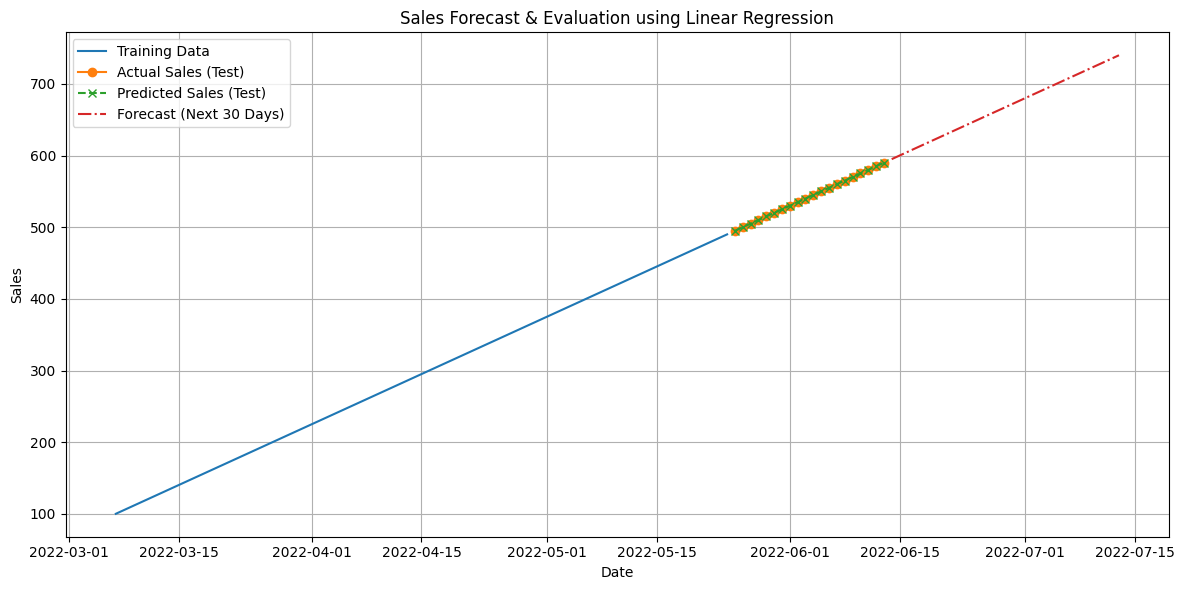

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(train_df['date'], y_train, label='Training Data')
plt.plot(test_df['date'], y_test, label='Actual Sales (Test)', marker='o')
plt.plot(test_df['date'], y_pred, label='Predicted Sales (Test)', linestyle='--', marker='x')
plt.plot(future_df['date'], future_df['predicted_sales'], label='Forecast (Next 30 Days)', linestyle='-.')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast & Evaluation using Linear Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()